# Centroid Classification

In [25]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.dataloader import default_collate

import cv2

#%%
# Data Loader
import sys
# path = os.getcwd()
sys.path.insert(0, 'C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/autotetris')
#from autotetris.dataloader import RoofDataSet
from dataloader import RoofDataSet, Transforms, show_centroids
from modeltraining import Resnet18, PadMSEloss, VarMSEloss, train_model, test_model

## Import

In [12]:
path = 'C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/Dataset/data_2022-11-01/meta_data.hdf'
input_path = path

## loading

In [13]:
dataset = RoofDataSet(path, transform=Transforms(new_size=(256,256)), mode = "constant")
imp_path = dataset.image_paths +  "/"+dataset.id[0]+"-b15-otovowms.jpeg"
image = cv2.imread(imp_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#%%
# split the dataset into training, validation and test sets
# Create testset
len_test_set = int(0.1*len(dataset))
len_train_set = len(dataset) - len_test_set

-------------------- Initializing dataset --------------------
--> Metadata read
--> Num_panels computed
--> Samples with many panels dropped
--> Padding samples
--> Dataset ready


In [14]:
train_dataset , test_dataset  = torch.utils.data.random_split(dataset, [len_train_set, len_test_set])


len_valid_set = int(0.1*len(train_dataset))
len_train_set = len(train_dataset) - len_valid_set

train_dataset, valid_dataset = torch.utils.data.random_split(train_dataset, [len_train_set, len_valid_set])

In [15]:
print("The length of Train set is {}".format(len_train_set))
print("The length of Valid set is {}".format(len_valid_set))
print("The length of Test set is {}".format(len_test_set))


# shuffle and batch the datasets
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=lambda x: tuple(x_.to("cpu") for x_ in default_collate(x)))
# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

The length of Train set is 30083
The length of Valid set is 3342
The length of Test set is 3713


In [68]:
it = iter(train_loader)
imgs, cords = next(it)
img = imgs[0].squeeze()
img = img.permute(1, 2, 0)
centroids = cords.numpy()
centroids = centroids[0]

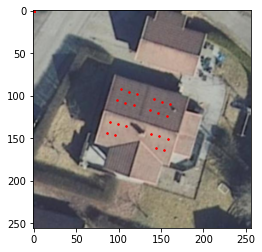

In [76]:
imgs, cords = next(it)
img = imgs[0].squeeze()
img = img.permute(1, 2, 0)
centroids = cords.numpy()
centroids = centroids[0]
show_centroids(img, centroids)

In [77]:
img.shape

torch.Size([256, 256, 3])